# Tabular Learning and the Bellman Equation 

## Value, state, and optimality

The value of the state formula:

\begin{equation}
V(s)=\mathbb{E}\left[\sum_{t=0}^{\infty} r_{t} \gamma^{t}\right]
\end{equation}

Where 𝑟 is the local reward obtained at the time step t of the episode. The total reward could be discounted wiht the value of gamma. The values is always calculated in terms of some policy that our agent follows. 

Lets illustrate a simple environment with three states:

1. The agent's initial state.

2. The final state that the agent is in after executing action "right" from the initial state. The reward obtained from this is 1.

3. The final state that the agent is in after executing the action "down" from the intial state. The reward here is 2.0.

The environment is always derterministic where every action succeeds and we always start from state 1. Once we reach either state 2 or state 3, the episode ends. Now the question is what is the state of the agent at the start. This question is meaningless without information about the agent's behavior or in other words its policy. 


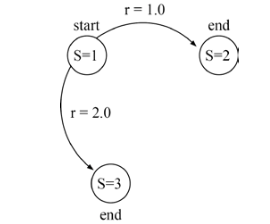

Example behaviors of the agent:

1. Agent always goes right

2. Agent always goes down

3. Agent goes right with a probability of 0.5 and down with a probability of 0.5

4. Agent goes right in 10% of cases and in 90% of cases executes the "down" action 

The value for each of the actions is as the following:

1. The value of state 1 in the case of the "always right" agent 1.0(every time it goes left, it obtains 1 and the episode ends)

2. For the "always down" agent, the value of state 1 is 2.0

3. For the 50% right/50% down agent, the value is 1.0 * 0.5 + 2.0 * 0.5 = 1.5

4. For the 10% right/90% down agent, the value is 1.0 * 0.1 + 2.0 * 0.9 = 1.9

Now the question is what is the optimal policy for this agent?

The goal of RL is to get as much total reward as possible. For this one-step environment, the total reward is equal to the value of state 1, which is the maximum policy at 2. 

With this example you would have a false impression that always selecting the action with the highest reward. To show why this is not the case we will use the following example.

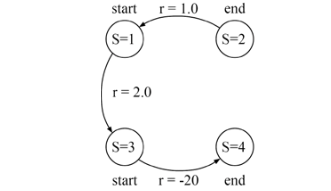

In the example once we select the "down" action we will be hit with a reward of -20 which is unavoidable. This represents a trap for the agent if it decides to be too greedy.

Our values for state 1 will calculated as the following:

1. The "always right" agent is the same at 1.0

2. The "always down" agent gets 2.0 + -20 = -18

3. The 50%/50% agent gets 0.5 * 1.0 + 0.5 * (2.0 + (–20)) = –8.5

4. The 10%/90% agent gets 0.1 * 1.0 + 0.9 * (2.0 + (–20)) = –16.1

So the best policy for the agent now is to always go right as that has the highest value of state 1. 



## The Bellman equation of optimality

### Deterministic case

Here all our actions have a 100% guaranteed outcome. Imagine that the agent observes state s_0 and has *N* available actions. Every action leads to another state with a respective reward, *r*. 

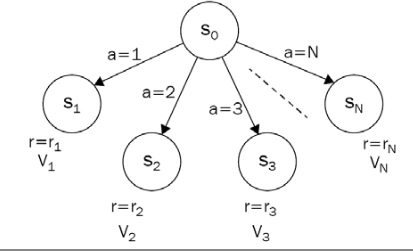

To choose the best possible action, the agent needs to calculate the resulting values for every action and choose the max possible outcome. If we are using the discount factor gamma, we need to multiply the value of the next state by gamma:

\begin{equation}
V_{0}=\max _{a \in 1 \ldots N}\left(r_{a}+\gamma V_{a}\right)
\end{equation}

Important thing to note about this equation is that we look at the immediate reward plus the long-term value of the state. 

This equation is called the Bellman equation of value for a deterministic case. 





## Stochasitic case

Here what we need to do is calculate the expected value for every action instead of just taking the value of the next state.

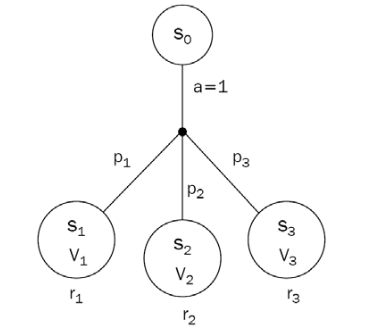

Here we have one action, which can lead to three different states with different probabilities. To calculate the expected value after issuing action 1, we need to sum all values, multiplied by their probabilities. 

\begin{equation}
V_{0}(a=1)=p_{1}\left(r_{1}+\gamma V_{1}\right)+p_{2}\left(r_{2}+\gamma V_{2}\right)+p_{3}\left(r_{3}+\gamma V_{3}\right)
\end{equation}

Or more formally:

\begin{equation}
V_{0}(a)=\mathbb{E}_{s \sim S}\left[r_{s, a}+\gamma V_{s}\right]=\sum_{s \in S} p_{a, 0 \rightarrow s}\left(r_{s, a}+\gamma V_{s}\right)
\end{equation}

By combining the Bellman equation, for a deterministic case, with a value for stochastic actions, we get the Bellman optimality equation for a general case:

\begin{equation}
V_{0}=\max _{a \in A} \mathbb{E}_{s \sim S}\left[r_{s, a}+\gamma V_{s}\right]=\max _{a \in A} \sum_{s \in S} p_{a, 0 \rightarrow s}\left(r_{s, a}+\gamma V_{s}\right)
\end{equation}

The optimal value of the state is equal to the action, which gives us the maximum possible expected immediate reward, plus the discounted long-term reward for the next state. 

This defintion is also recursive where the value of the state is defined via the values of the immediately reachable states. 

These values not only gives us the best reward that we can obtain, but they basically give us the optimal policy to obtain that reward: if our agent knows the value for every state, then it automatically gather all this reward. 

Basically at every state the agent ends up in, it needs to select the action with the maximum expected reward, which is a sum of the immediate reward and the one-step discounted long-term reward. 

## The value of the action 

This equals the total reward we can get by executing  action *a* in state *s* and can be defined via *V(s)*. 

The main objective is to get values of *Q* for every pair of state and action. 

\begin{equation}
Q(s, a)=\mathbb{E}_{s^{\prime} \sim S}\left[r(s, a)+\gamma V\left(s^{\prime}\right)\right]=\sum_{s^{\prime} \in S} p_{a, s \rightarrow s^{\prime}}\left(r(s, a)+\gamma V\left(s^{\prime}\right)\right)
\end{equation}

*Q* for this state *s* and action *a* equals the expected immediate reward and the discounted long-term reward of the destination state. 

\begin{equation}
V(s)=\max _{a \in A} Q(s, a)
\end{equation}

This means that the value of some state is equal to the value of the maximum action we can execute from this state.
\begin{equation}
Q(s, a)=r(s, a)+\gamma \max _{a^{\prime} \in A} Q\left(s^{\prime}, a^{\prime}\right)
\end{equation}

If immediate reward is given to us after executing a particular action, *a*, from state *s*, index *(s, a)* is used and the formula is exactly as shown above. But if reward is provided for reaching some state, *s'*, via action *a'*, the reward will have the index *(s', a')* and will need to be moved into the max operator. 


### Example 

Here is a simple example to show how the value of the action works.

This is similar to the FrozenLake example where there is a 33% chance that the agent will slip to the left or the right relative to the target cell. 

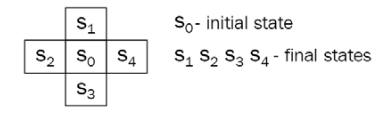


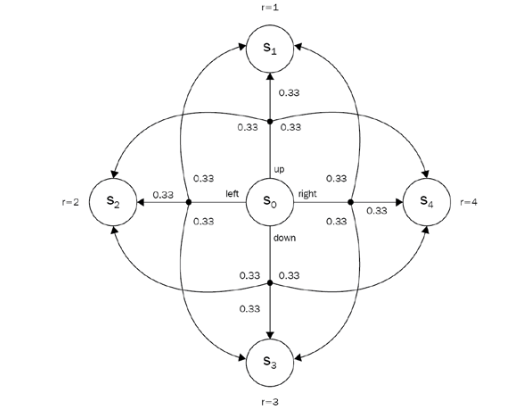

Terminal states do now have any outbound connection so the *Q* for those states is zero for all actions. Due to this the values for these states is equal to their immediate reward *V1 = 1, V2 = 2, V3 = 3, V4 = 4*.

\begin{equation}
Q\left(s_{0}, u p\right)=0.33 \cdot V_{1}+0.33 \cdot V_{2}+0.33 \cdot V_{4}=0.33 \cdot 1+0.33 \cdot 2+0.33 \cdot 4=2.31
\end{equation}

\begin{equation}
\begin{aligned}
Q\left(s_{0}, \text {left}\right) &=0.33 \cdot V_{1}+0.33 \cdot V_{2}+0.33 \cdot V_{3}=1.98 \\
Q\left(s_{0}, \text {right}\right) &=0.33 \cdot V_{4}+0.33 \cdot V_{1}+0.33 \cdot V_{3}=2.64 \\
Q\left(s_{0}, \text { down}\right) &=0.33 \cdot V_{3}+0.33 \cdot V_{2}+0.33 \cdot V_{4}=2.97
\end{aligned}
\end{equation}

The final value of *Q* is the maximum of those actions' values which is *2.97*. 

Q-values are much more convenient in practice, as for the agent, it's much simpler to make decisions about actions based on Q than on V. 

In the case of Q, to choose the action based on the state, the agent just needs to calculate Q for all available actions using the current state and choose the action with the largest value of Q. 

To do the same using values of the states, the agent needs to know not only values, but also probabilities for transitions. 

In practice, we rarely know them in advance, so the agent needs to estimate transition probabilities for every action and state pair. Later in this chapter, you will see this in practice by solving the FrozenLake environment both ways. However, to be able to do this, we have one important thing still missing: a general way to calculate those Vs and Qs.

## The value iteration method

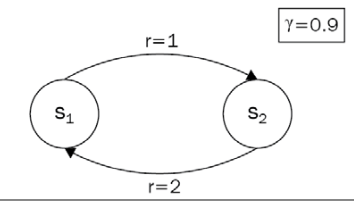

We starrt from state *s* and the only action we can take leads us to state *s_2*. We get the reward *r* = 1 and the only transition from *s_2* is back to *s*. Which results in an infinite loop but we can deal with it by setting the discount factor to 0.9. The value of the state will be equal to an infinite sum 

\begin{equation}
\begin{aligned}
V\left(s_{1}\right) &=1+\gamma(2+\gamma(1+\gamma(2+\cdots)))=\sum_{i=0}^{\infty} 1 \gamma^{2 i}+2 \gamma^{2 i+1} \\
V\left(s_{2}\right) &=2+\gamma(1+\gamma(2+\gamma(1+\cdots)))=\sum_{i=0}^{\infty} 2 \gamma^{2 i}+1 \gamma^{2 i+1}
\end{aligned}
\end{equation}

Technically we cannot calculate the exact values of state but with the discount factor set to 0.9, the contribution for every transition quickly decreases over time. After 10 steps the value is equal to 0.349, but after 100 steps it is 0.00002666. Therefore we can stop after 50 iterations and get a precise estimation. 



In [6]:
sum([0.9**(2*i) + 2*(0.9**(2*i+1)) for i in range(50)])

14.736450674121663

In [4]:
sum([2*(0.9**(2*i)) + 0.9**(2*i+1) for i in range(50)])

15.262752483911719

The preceeding example can be used to get the gist of a more general procedure called the **value iteration algorithm**. 

The procedure for the values of the states:

1. Intialize the values for all staes , **V_s** to some initial value (usually zero).

2. For every state *s*, in the Markov Decision Process, perform the Bellman update

\begin{equation}
V_{s} \leftarrow \max _{a} \sum_{s^{\prime}} p_{a, s \rightarrow s^{\prime}}\left(r_{s, a}+\gamma V_{s^{\prime}}\right)
\end{equation}

3. Repeat step 2 for some large number of steps or until changes become too small.

The procedure for the actions of the values:

1. Intialize every *Q_s,a* to zero.

2. For every state, *s*, and action *a* in this state perform this update:

\begin{equation}
Q_{s, a} \leftarrow \sum_{s^{\prime}} p_{a, s \rightarrow s^{\prime}}\left(r_{s, a}+\gamma \max _{a^{\prime}} Q_{s^{\prime}, a^{\prime}}\right)
\end{equation}

3. Repeat step 2.
